In [1]:
import librosa
import numpy as np
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
import ffmpeg
from pydub import AudioSegment
import pandas as pd
import tqdm as tqdm

c:\Users\Abdelaleem\anaconda3\Lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


load the data
---------

In [2]:
audio_files_dir = r"D:\data science\audio\Data\Data\audio_files\TrainAudioFiles"
output_dir = r"D:\data science\audio\wav_files"

In [3]:
new_path = r"D:\data science\audio\Data\Data\audio_files\TrainAudioFiles"
# Change the current working directory to the new path
os.chdir(new_path)

NameError: name 'os' is not defined

In [5]:
os.listdir()[:5]

['0.mp3', '1.mp3', '100.mp3', '1005.mp3', '1006.mp3']

In [6]:
import subprocess
import soundfile as sf


input_dir = r"D:\data science\audio\Data\Data\audio_files\TrainAudioFiles"
output_dir = r"D:\data science\audio\wav_files"



os.makedirs(output_dir, exist_ok=True)

for file_name in os.listdir(input_dir):
    if not file_name.endswith(".wav"):
        input_path = os.path.join(input_dir, file_name)
        output_path = os.path.join(output_dir, os.path.splitext(file_name)[0] + ".wav")

        try:
            data, samplerate = sf.read(input_path)
            sf.write(output_path, data, samplerate)
            print(f"Converted {file_name} to {os.path.basename(output_path)}")
        except Exception as e:
            print(f"Error converting {file_name}: {e}")

Converted 0.mp3 to 0.wav
Converted 1.mp3 to 1.wav
Converted 100.mp3 to 100.wav
Converted 1005.mp3 to 1005.wav
Converted 1006.mp3 to 1006.wav
Converted 1007.mp3 to 1007.wav
Converted 1010.mp3 to 1010.wav
Converted 1013.mp3 to 1013.wav
Converted 1014.mp3 to 1014.wav
Converted 10303.mp3 to 10303.wav
Converted 10304.mp3 to 10304.wav
Converted 10309.mp3 to 10309.wav
Converted 10313.mp3 to 10313.wav
Converted 10315.mp3 to 10315.wav
Converted 10318.mp3 to 10318.wav
Converted 10321.mp3 to 10321.wav
Converted 10322.mp3 to 10322.wav
Converted 10329.mp3 to 10329.wav
Converted 1033.mp3 to 1033.wav
Converted 10330.mp3 to 10330.wav
Converted 10332.mp3 to 10332.wav
Converted 1034.mp3 to 1034.wav
Converted 10344.mp3 to 10344.wav
Converted 10345.mp3 to 10345.wav
Converted 10357.mp3 to 10357.wav
Converted 10366.mp3 to 10366.wav
Converted 10373.mp3 to 10373.wav
Converted 10374.mp3 to 10374.wav
Converted 1038.mp3 to 1038.wav
Converted 10384.mp3 to 10384.wav
Converted 10388.mp3 to 10388.wav
Converted 10393

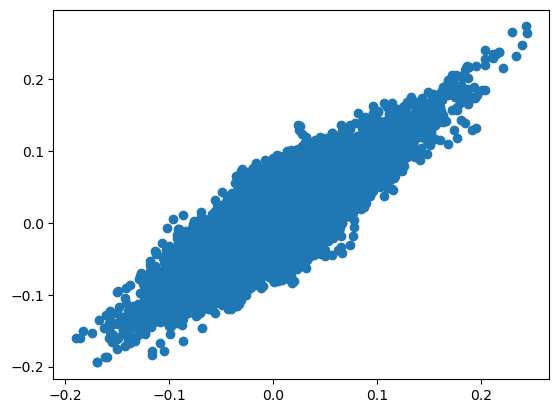

In [10]:
import matplotlib.pyplot as plt
plt.scatter(data[: , 0] , data[: , 1])

In [25]:
data.shape

(107604, 2)

In [19]:
samplerate

44100

-----

In [69]:
data

array([[-0.01507568,  0.00430298],
       [-0.02145386,  0.00027466],
       [-0.03720093, -0.00720215],
       ...,
       [-0.06103516, -0.06600952],
       [-0.06686401, -0.07315063],
       [-0.05200195, -0.0562439 ]])

In [23]:
df_ = pd.read_excel("D:\data science\data_audio.xlsx")

In [24]:
df_["wav"] = df_["filename"].str.replace('.mp3', '.wav')

C:\Users\Abdelaleem\AppData\Local\Temp\ipykernel_23000\1465022392.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_["wav"] = df_["filename"].str.replace('.mp3', '.wav')


In [13]:
df["wav"].isna().sum()

0

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5816 entries, 0 to 5815
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  5816 non-null   object
 1   emotion   5816 non-null   object
 2   wav       5816 non-null   object
dtypes: object(3)
memory usage: 136.4+ KB


In [25]:
df_["num"] = df_["wav"].str.replace(".wav" , "").astype(int)

C:\Users\Abdelaleem\AppData\Local\Temp\ipykernel_23000\2053375125.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_["num"] = df_["wav"].str.replace(".wav" , "").astype(int)


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5816 entries, 0 to 5815
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  5816 non-null   object
 1   emotion   5816 non-null   object
 2   wav       5816 non-null   object
 3   num       5816 non-null   int32 
dtypes: int32(1), object(3)
memory usage: 159.2+ KB


In [26]:
df_ = df_.sort_values(by = "num" , ascending = True)

In [21]:
import os
import pandas as pd
import numpy as np
import soundfile as sf
from scipy.fftpack import fft

# Path to the directory containing the .wav files
wav_dir =  r"D:\data science\audio\wav_files"



# Prepare a list to hold the data and labels
data_list = []
label_list = []

# Iterate over each .wav file in the directory
for index, row in df.iterrows():
    file_name = row['wav']  
    label = row['emotion']  

    file_path = os.path.join(wav_dir, file_name)
    print(file_path)
    # Check if the file exists
    if os.path.exists(file_path):
        # Load the .wav file
        data, samplerate = sf.read(file_path)

        # Normalize the audio data
        if data.dtype == np.int16:
            data = data / (2**15)
        elif data.dtype == np.int32:
            data = data / (2**31)
        elif data.dtype == np.float32 or data.dtype == np.float64:
            pass  # data is already in the range [-1, 1]

        # Perform Fast Fourier Transform (FFT)
        fft_spectrum = fft(data, axis=0)
        fft_magnitude = np.abs(fft_spectrum)

        # Example: Take the mean of the FFT magnitude as a simple feature
        feature = np.mean(fft_magnitude, axis=0)

        # Append the feature and label to the lists
        data_list.append(feature)
        label_list.append(label)

    else:
        print(f"Warning: {file_name} not found in {wav_dir}")

# Convert the lists to a NumPy array
X = np.array(data_list)
y = np.array(label_list)

# Optionally, you can convert these to pandas DataFrame for further processing
df = pd.DataFrame(X)
df['Label'] = y

# Save the combined data to a CSV file if needed
df.to_csv("combined_training_data.csv", index=False)

print("Training data created successfully!")


D:\data science\audio\wav_files\0.wav
D:\data science\audio\wav_files\1.wav
D:\data science\audio\wav_files\12.wav
D:\data science\audio\wav_files\16.wav
D:\data science\audio\wav_files\33.wav
D:\data science\audio\wav_files\34.wav
D:\data science\audio\wav_files\37.wav
D:\data science\audio\wav_files\42.wav
D:\data science\audio\wav_files\43.wav
D:\data science\audio\wav_files\48.wav
D:\data science\audio\wav_files\49.wav
D:\data science\audio\wav_files\51.wav
D:\data science\audio\wav_files\53.wav
D:\data science\audio\wav_files\54.wav
D:\data science\audio\wav_files\56.wav
D:\data science\audio\wav_files\58.wav
D:\data science\audio\wav_files\68.wav
D:\data science\audio\wav_files\70.wav
D:\data science\audio\wav_files\72.wav
D:\data science\audio\wav_files\78.wav
D:\data science\audio\wav_files\80.wav
D:\data science\audio\wav_files\86.wav
D:\data science\audio\wav_files\94.wav
D:\data science\audio\wav_files\95.wav
D:\data science\audio\wav_files\97.wav
D:\data science\audio\wav_f

In [30]:
fft_spectrum

array([[-2.67590332-0.j        , -2.93621826-0.j        ],
       [ 1.61249264-0.0766376j ,  1.28575778-0.04331432j],
       [ 1.23472829-1.89678253j,  0.26370529-0.29519168j],
       ...,
       [ 0.27755517-1.9504323j ,  0.4207181 -1.7968451j ],
       [ 1.23472829+1.89678253j,  0.26370529+0.29519168j],
       [ 1.61249264+0.0766376j ,  1.28575778+0.04331432j]])

In [32]:
feature

array([0.70992737, 0.74120179])

In [31]:
fft_magnitude

array([[2.67590332, 2.93621826],
       [1.61431281, 1.28648715],
       [2.26325825, 0.39582648],
       ...,
       [1.97008199, 1.84544196],
       [2.26325825, 0.39582648],
       [1.61431281, 1.28648715]])

In [29]:
df_.shape

(5816, 4)

In [28]:
df_[df_["wav"].str.contains("38522.wav")]

,filename,emotion,wav,num
2962,38522.wav,fear,38522.wav,38522


train the model, NOTE: i haven't studied RNN yet so i trained an xgboost classifier
------------------

In [126]:
from sklearn.preprocessing import LabelEncoder

# Assuming y contains categorical labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Convert to PyTorch tensor
y_tensor = torch.tensor(y_encoded, dtype=torch.long)

In [128]:
y_tensor.unique()

tensor([0, 1, 2, 3, 4, 5, 6])

In [129]:
y_encoded

array([4, 4, 6, ..., 4, 3, 3], dtype=int64)

In [33]:
X

array([[10.04459841, 10.00756339],
       [ 4.57064454,  4.64937304],
       [ 4.83535228,  4.81197696],
       ...,
       [ 2.30097278,  2.34395317],
       [ 4.15176219,  4.13707508],
       [ 0.70992737,  0.74120179]])

In [34]:
y

array(['neutral', 'neutral', 'surprise', ..., 'neutral', 'joy', 'joy'],
      dtype='<U8')

In [165]:
x_train , x_test , y_train , y_test = train_test_split(X , y_encoded , test_size = 0.2 ,random_state = 42)

In [166]:
import xgboost as xgb
from xgboost import XGBClassifier

In [167]:
model = XGBClassifier(n_estimators=150)

In [168]:
model.fit(x_train , y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=150, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [169]:
from sklearn.metrics import confusion_matrix

In [170]:
# Make predictions
y_pred = model.predict(x_test)

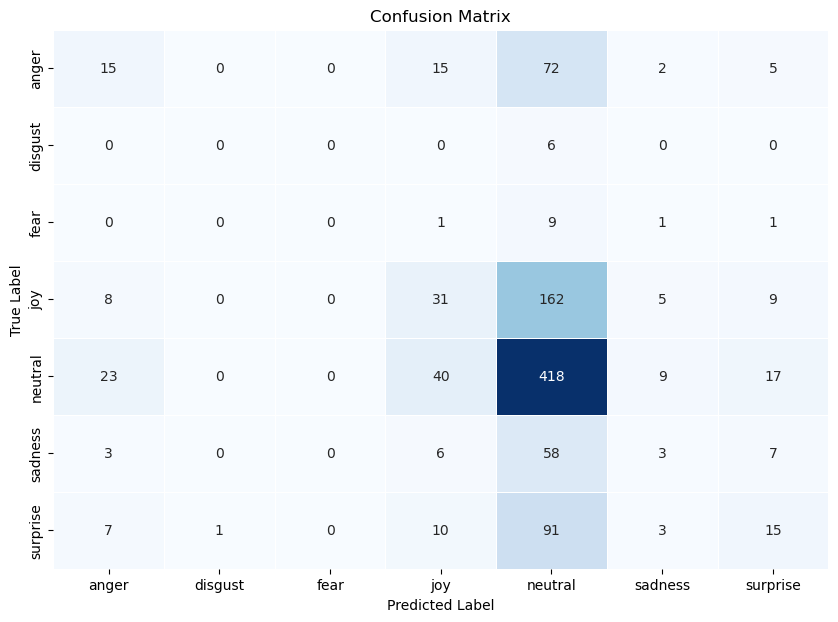

In [171]:
import seaborn as sns
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame for better visualization
cm_df = pd.DataFrame(cm, index=label_encoder.classes_, columns=label_encoder.classes_)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=.5)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

there wasn't enough time to find the optimum hyperparametrs :)
---------

In [151]:
import pickle

with open('xgb_model.pkl', 'wb') as f:
    pickle.dump(model, f)
# Load the model using pickle
with open('xgb_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# Use the loaded model to make predictions
predictions = loaded_model.predict(x_test)

In [152]:
predictions

array([4, 4, 4, ..., 3, 4, 6], dtype=int64)

In [153]:
os.getcwd()

'D:\\data science\\audio\\Data\\Data\\audio_files\\TrainAudioFiles'

<Axes: >

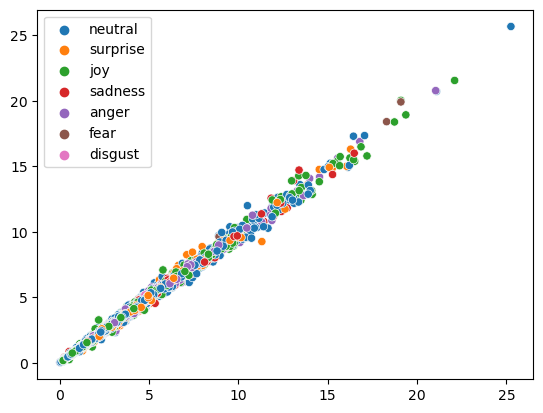

In [164]:
import matplotlib.pyplot as plt
sns.scatterplot(x = X[: , 0] , y =X[: , 1], hue=y )

In [158]:
data[: , 1]

array([ 1.98364258e-03,  2.68554688e-03,  2.25830078e-03, ...,
       -3.05175781e-05, -6.10351562e-05, -6.10351562e-05])

In [159]:
data[: , 0]

array([ 1.86157227e-03,  2.50244141e-03,  2.10571289e-03, ...,
        0.00000000e+00, -6.10351562e-05, -9.15527344e-05])